In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Visualization imports
import seaborn as sns
%matplotlib inline
import plotly.express as px

#NLP imports
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, plot_confusion_matrix
ps = PorterStemmer()
import re
import nltk
import networkx as nx
from gensim.models import word2vec

#Scikit Learn imports
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading Data
df = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
#Creating text length and text word count for analysis
df['text_length'] = [len(i) for i in df['text']]
df['text_word_count'] = [len(i) for i in df['text'].str.split()]
df.head(2)

,id,keyword,location,text,target,text_length,text_word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7


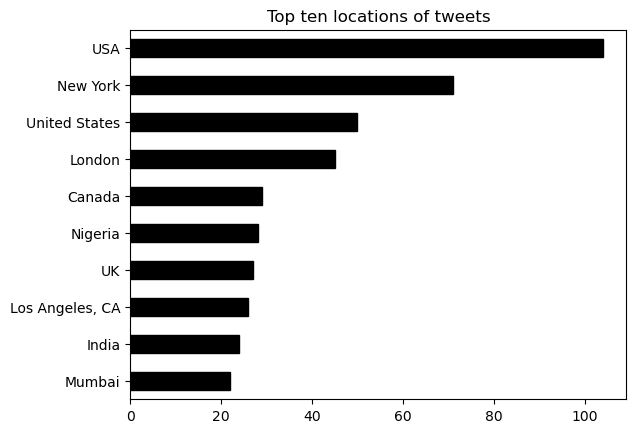

In [4]:
df['location'].value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh', color = 'black',
                                                                          edgecolor = 'black')
                                                                         
plt.title("Top ten locations of tweets")
plt.savefig('../images/location.png');

In [5]:
#Largest word counts in my data
df.loc[df['text_word_count'] > 29, ['text', 'text_word_count']]

,text,text_word_count
954,If you have a son or a daughter would you like...,31
1947,In the beginning of summer my mom made my curf...,30
2089,I will only call or text 2 niggas my bff &amp;...,30
3859,I chose you so if we can search for the joy of...,30
4432,When u get mugged with ur gf u come up with th...,31
5005,I remember when I worked at Mcdonalds I use to...,31
6005,@OllyMursAus I do feel sorry for him! He is no...,30
6794,This is a tragedy: I added the wrong book to m...,30
7220,I'm sorry but if you have to resort to weapons...,30


In [6]:
#Smallest word counts in the data
df.loc[df['text_word_count'] < 2, ['text', 'text_word_count']]

,text,text_word_count
24,LOOOOOOL,1
1882,Crushed,1
3667,Fatality!,1
3670,fatality,1
4971,Meltdown,1
5115,Err:509,1
5184,Obliterated,1
6705,Thunder???,1


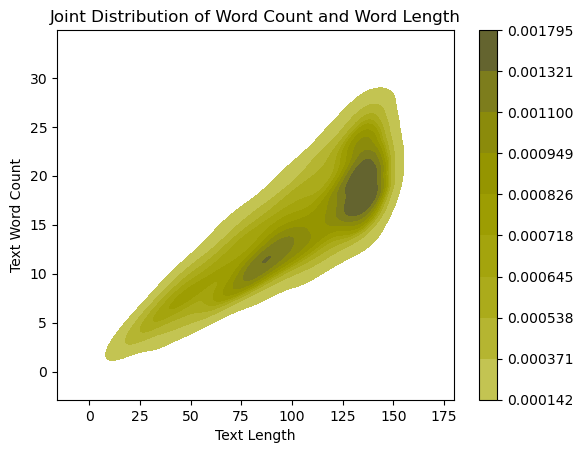

In [7]:
sns.kdeplot(df['text_length'], df['text_word_count'], 
            n_levels = 10, shade = True,cbar = True, color = 'yellow')
plt.xlabel("Text Length")
plt.ylabel("Text Word Count")
plt.title("Joint Distribution of Word Count and Word Length")
plt.savefig('../images/kdeplot.png');

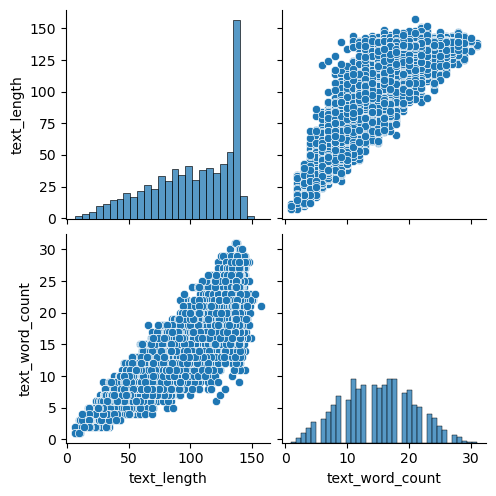

In [8]:
sns.pairplot(df[['text_length', 'text_word_count']])

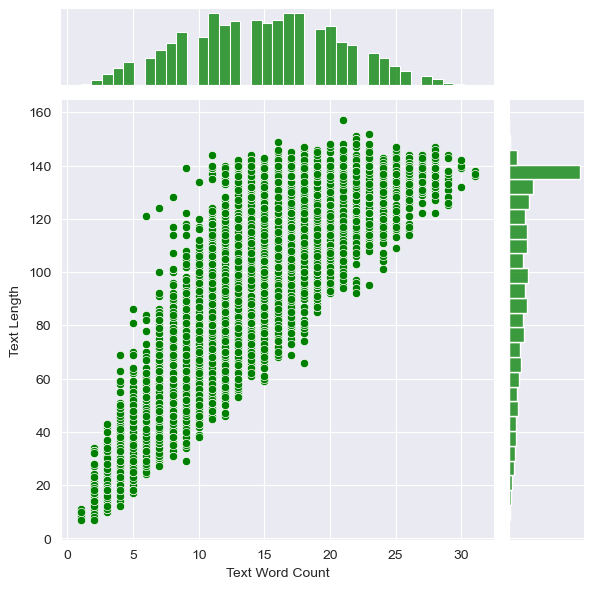

In [9]:
sns.set_style('darkgrid')
g = sns.JointGrid(df['text_word_count'], df['text_length'])
g.plot(sns.scatterplot, sns.histplot, color = 'green')
g.set_axis_labels("Text Word Count", "Text Length")
plt.savefig('../images/jointgrid.png');

In [10]:
df[['text_length', 'text_word_count']].describe()

,text_length,text_word_count
count,7613.000000,7613.000000
mean,101.037436,14.903586
std,33.781325,5.732604
min,7.000000,1.000000
25%,78.000000,11.000000
50%,107.000000,15.000000
75%,133.000000,19.000000
max,157.000000,31.000000


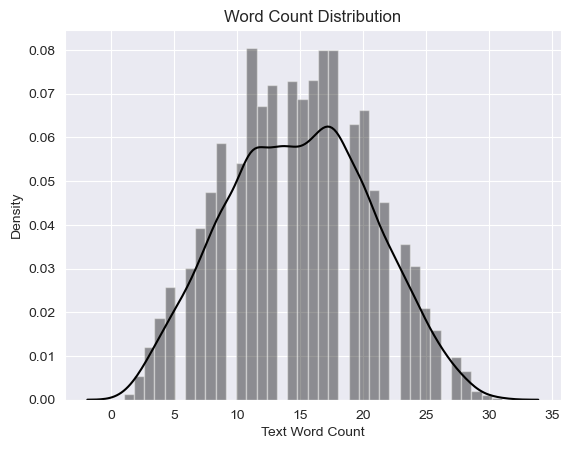

In [11]:
sns.distplot(df['text_word_count'], color = 'black')
plt.xlabel("Text Word Count")
plt.title("Word Count Distribution")
plt.savefig('../images/wordcount.png');

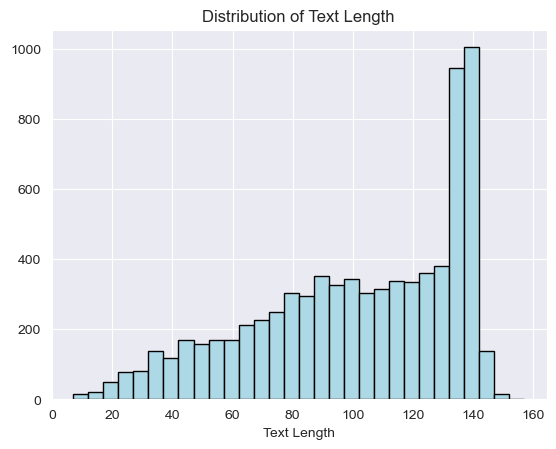

In [12]:
sns.cubehelix_palette(start = 2, rot = 1, light = 10, dark = 10)
plt.hist(df['text_length'], color = 'lightblue', bins = 30, edgecolor = 'black')
plt.xlabel('Text Length')
plt.title("Distribution of Text Length")
plt.savefig('../images/distplot1');

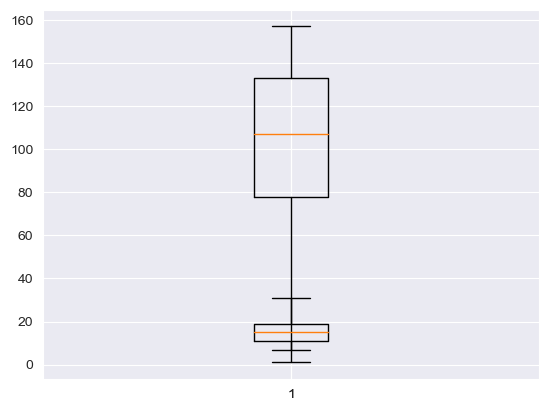

In [13]:
plt.boxplot(df['text_length'])
plt.boxplot(df['text_word_count']);

In [14]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub(r"http\S+", "", df['text'][i]) # This code removes links from text
    review = re.sub('[^a-zA-Z\d+]', ' ', review) 
    review = re.sub('[0-9]', '', review) 
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word, pos = 'v') for word in review if not word in stopwords.words('english')]
    review = [lemmatizer.lemmatize(word, pos = 'n') for word in review]
    review = [lemmatizer.lemmatize(word, pos = 'a') for word in review] 
    review = ' '.join(review)
    corpus.append(review)

In [15]:
## Creating a Dictionary to see most frequent words
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [16]:
## Using heap module in python to see 10 most frequent words
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)
most_freq[0:10]

['get', 'like', 'fire', 'amp', 'go', 'u', 'bomb', 'new', 'via', 'one']

In [17]:
#separating fake and real tweets 
real = df.loc[df.target == 1, 'text']
fake = df.loc[df.target == 1, 'text']

In [18]:
cv = CountVectorizer(stop_words = 'english', ngram_range = (1,2))
cv.fit(real)

CountVectorizer(ngram_range=(1, 2), stop_words='english')

In [19]:
cv_fake = CountVectorizer(stop_words = 'english', ngram_range = (1,2))
cv_fake.fit(fake)

CountVectorizer(ngram_range=(1, 2), stop_words='english')

In [20]:
real_cv = cv.transform(real)

In [21]:
fake_cv = cv_fake.transform(fake)

In [22]:
real_df = pd.DataFrame(real_cv.todense(), 
                          columns=cv.get_feature_names())
real_df.head(2)

,00,00 11,00 18,00 52,00 ep,00 epicenter,00 hiroshima,00 http,00 nnw,00 pm,...,ûó richmond,ûó rt,ûóher,ûóher upper,ûókody,ûókody vine,ûónegligence,ûónegligence fireworks,ûówe,ûówe work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
fake_df = pd.DataFrame(fake_cv.todense(), 
                          columns=cv.get_feature_names())
fake_df.head(2)

,00,00 11,00 18,00 52,00 ep,00 epicenter,00 hiroshima,00 http,00 nnw,00 pm,...,ûó richmond,ûó rt,ûóher,ûóher upper,ûókody,ûókody vine,ûónegligence,ûónegligence fireworks,ûówe,ûówe work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
real_df.to_csv('../data/real.csv', index_label = None)
fake_df.to_csv('../data/fake.csv', index_label = None)

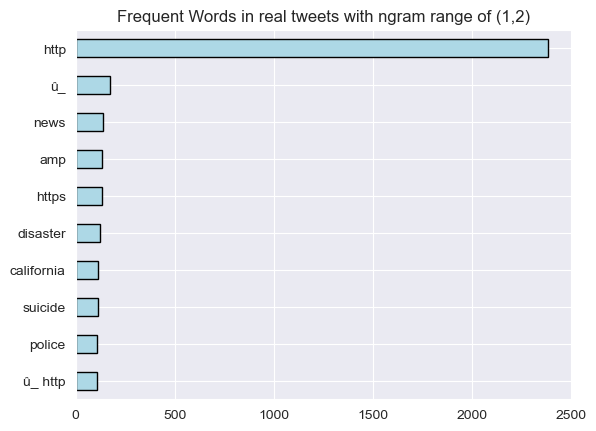

In [25]:
# Plot top occuring words in real tweets
real_df.sum().sort_values(ascending = True).tail(10).plot(kind = 'barh', color = 'lightblue',
                                                          edgecolor = 'black')
plt.title("Frequent Words in real tweets with ngram range of (1,2)")

plt.savefig('../images/real.png');

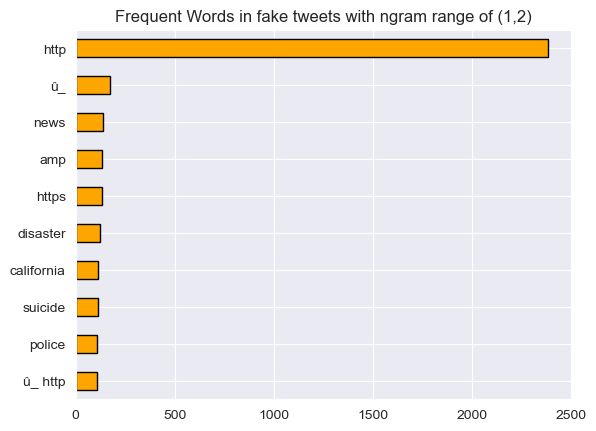

In [26]:
# Plot top occuring words in fake tweets
fake_df.sum().sort_values(ascending = True).tail(10).plot(kind = 'barh',color = 'orange',
                                                          edgecolor = 'black')
plt.title("Frequent Words in fake tweets with ngram range of (1,2)")
plt.savefig('../images/fake.png');

In [27]:
cv = CountVectorizer(stop_words = 'english', ngram_range = (2,3))
cv.fit(real)

CountVectorizer(ngram_range=(2, 3), stop_words='english')

In [28]:
real_cv = cv.transform(real)

In [29]:
fake_cv = cv.transform(fake)

In [30]:
real_df = pd.DataFrame(real_cv.todense(), 
                          columns=cv.get_feature_names())
real_df.head(2)

,00 11,00 11 16,00 11 utc,00 18,00 18 00,00 52,00 52 25,00 ep,00 ep http,00 epicenter,...,ûó rt,ûó rt news,ûóher upper,ûóher upper arm,ûókody vine,ûókody vine kombatfans33,ûónegligence fireworks,ûónegligence fireworks explosion,ûówe work,ûówe work tech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
fake_df = pd.DataFrame(fake_cv.todense(), 
                          columns=cv.get_feature_names())
fake_df.head(2)

,00 11,00 11 16,00 11 utc,00 18,00 18 00,00 52,00 52 25,00 ep,00 ep http,00 epicenter,...,ûó rt,ûó rt news,ûóher upper,ûóher upper arm,ûókody vine,ûókody vine kombatfans33,ûónegligence fireworks,ûónegligence fireworks explosion,ûówe work,ûówe work tech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


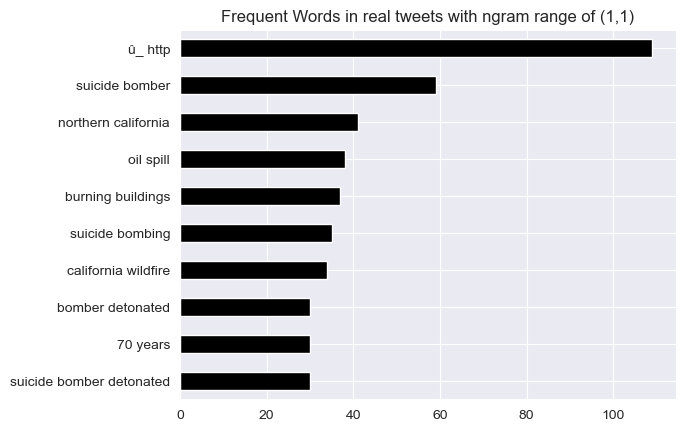

In [32]:
# Plot top occuring words in real tweets
real_df.sum().sort_values(ascending = True).tail(10).plot(kind = 'barh', color = 'black')
plt.title("Frequent Words in real tweets with ngram range of (1,1)")
plt.savefig('../images/real1.png');

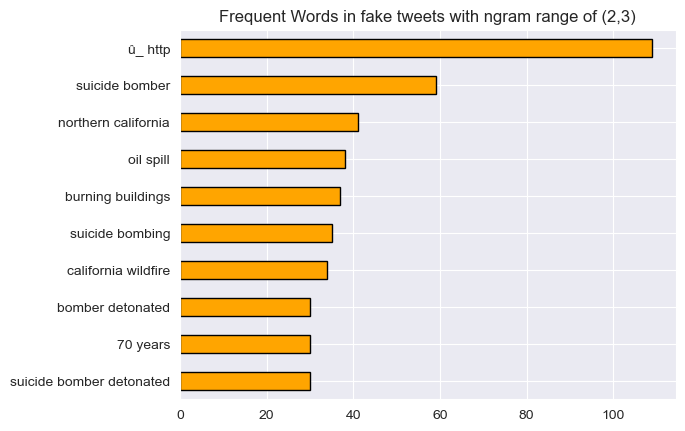

In [33]:
# Plot top occuring words in fake tweets
fake_df.sum().sort_values(ascending = True).tail(10).plot(kind = 'barh', color = 'orange',
                                                          edgecolor = 'black')
plt.title("Frequent Words in fake tweets with ngram range of (2,3)")
plt.savefig('../images/fake1.png');

In [34]:
#Looking at the keyword column when target ==1
df_realkey = df.loc[df.target == 1  ,['keyword', 'target']].dropna(axis =0, how = 'any')

In [35]:
df_realkey.tail()

,keyword,target
7542,wreckage,1
7543,wreckage,1
7552,wrecked,1
7559,wrecked,1
7572,wrecked,1


In [36]:
#Looking at the keyword column when target == 0
df_fakekey = df.loc[df.target == 0  ,['keyword', 'target']].dropna(axis =0, how = 'any')

In [37]:
df_fakekey.tail()

,keyword,target
7578,wrecked,0
7579,wrecked,0
7580,wrecked,0
7581,wrecked,0
7582,wrecked,0


#### It appears that the keywords are similar in real and fake tweets